<h1 ><font size = 5>Colombia's presidential speech 2022 visual analysis with python  </font></h1>

## Introduction
In this project I will be using some web scraping tools for python to have a simple sight of the most common words used on two different speechs from the President of Colombia found on the newspaper la gran noticia page for transcriptions.

After retrieving our data using <b>BeautifulSoup</b>, we will use the package <b>word_cloud</b> to convert our obteined text into a wordcloud image in order to focus on the words used on it.<br>  Also, I will be representing the top 10 most commont words on each one using <b>Matplotlib</b>.  The idea is to compare the difference between them within a year apart.

Finally, I will analyse the results in a very superficial way as the main goal for this project is to demostrate the utility from the used libraries for python.






### DATA
The data used for this project was scraped:
1. from the official inaugural speech of Gustavo Petro, which is the current president of Colombia transcription site https://www.lagrannoticia.com/ and then cleaned due to its sintaxis as the text use interview dialogue structure.
2. from the official speech of Lopez Obrador, which is the current president of Mexico transcription site https://lopezobrador.org.mx and then cleaned due to its sintaxis as the text use interview dialogue structure.
<br>
- The transcription of the speechs from the date "8th of Agust 2022" and "4th april 2019" were used.<br>
- The technologies used here were IBM Watson Studio for the environment of the Jupyter notebooks in python and GitHub for repository.

## METHODOLOGY


## Scraping data from newspaper La Gran Noticia using BeautifulSoup





In [3]:
#Import requests for web scraping

import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [4]:
website_url= rq.get('https://www.lagrannoticia.com/2022/08/08/lea-aqui-discurso-completo-posesion-presidencial-gustavo-petro-urrego/').text #Bring the data from the target URL

### Now we shall use BeautifulSoup library

In [5]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data


"['Petro amenaza con acabar el Fondo Nacional del Café', 'Oferta deportiva y recreativa al Centro de Reeducación\\xa0El Oasis, en Soledad', 'Avanzan obras de pavimentación, canalización y la construcción del deprimido en la Gran Vía', 'Realidad aumentada: 3 tips para entender cómo funciona\\xa0', 'Imputan a juez de familia que exigió dinero a funcionaria para no botarla', '16 años y 8 meses de cárcel a pareja de novios por asesinato de un reciclador en Medellín', 'Asegurado un hombre que habría abusado sexualmente de tres mujeres en Cartagena\\xa0', 'Estamos ante una tecnología que entiende la mente del cliente', 'Organizaciones se unen para brindar atención en dermatología a comunidades vulnerables\\xa0', 'Estos son los principales destinos escogidos por los colombianos en el primer semestre', 'Air France se prepara para los Juegos Olímpicos y Paralímpicos de París 2024', 'Patricia Caicedo denuncia grave derrame de aceite en la bahía de Santa Marta', 'Encuesta Fexe-Cifras y Conceptos:

# What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
For this task, we will be using the python library called 'word_cloud' developed by <b>Andreas Mueller</b>. <a hreef="https://github.com/amueller/word_cloud/">Here</a> you can find the repository and learn more about it.

In [2]:
!pip install wordcloud

In [6]:
!pip -q install stop-words

  Preparing metadata (setup.py) ... done


In [7]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [8]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [25]:
stop_words = ["año", "mil", "Es","No","millones","Colombia.", "pesos", "ciento", "El", "En","La","si","no","es","xa0","xa0Que","xa0La","xaUNo","xaOY","xa0Y","xaOAqui","xaONo"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
petro_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
petro_wc.generate(data)

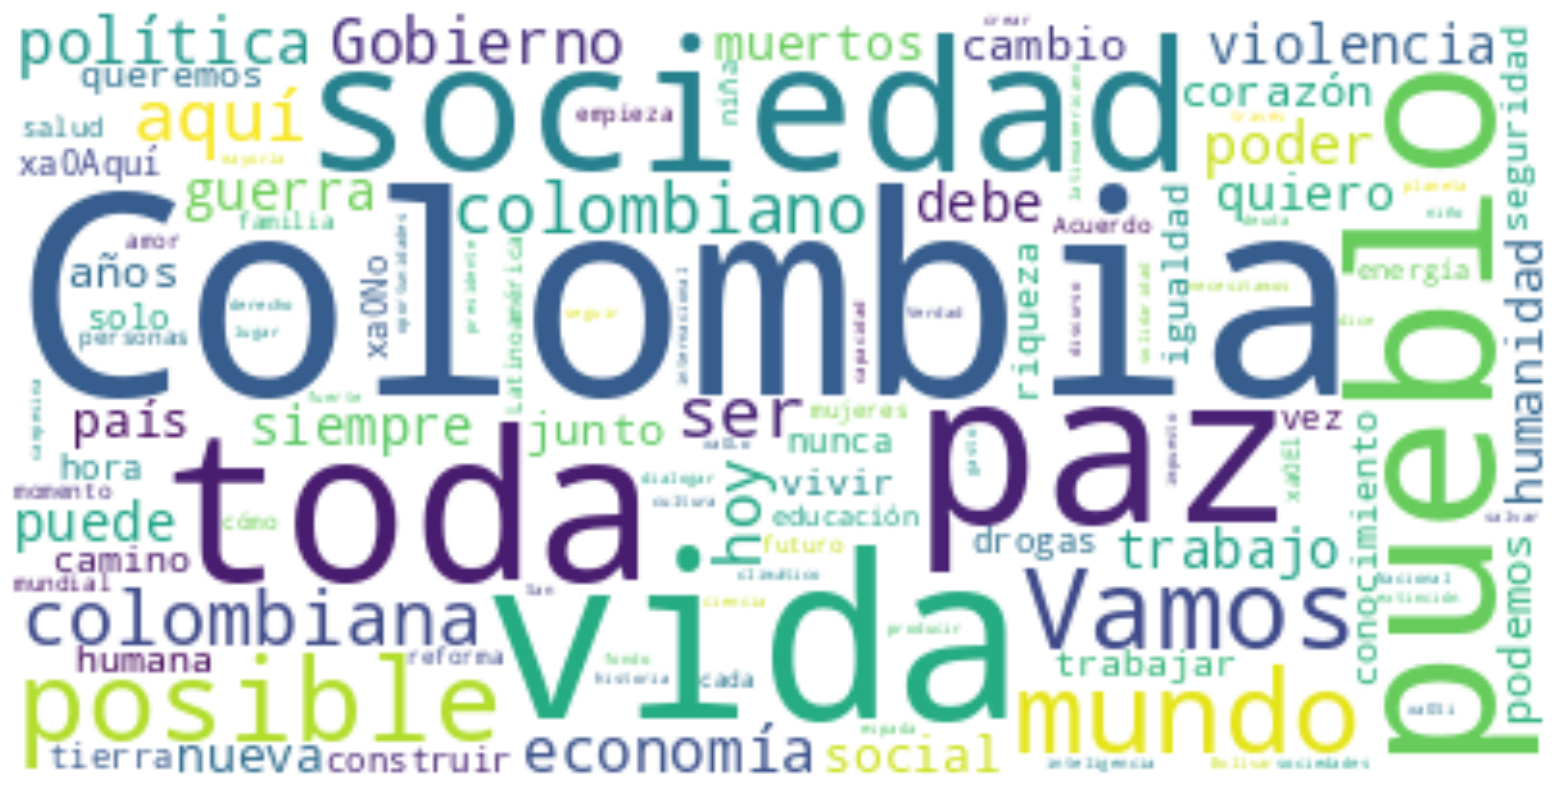

In [26]:
# display the word cloud
plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

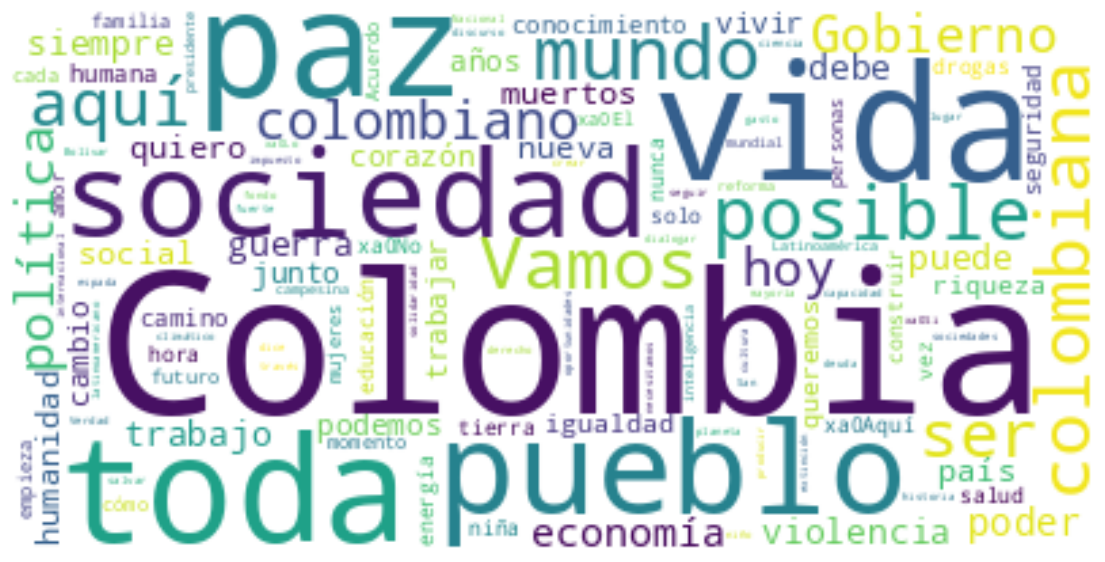

In [27]:

# re-generate the word cloud
petro_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


### Retrieving the image for the mask

In [28]:
!wget --quiet https://raw.githubusercontent.com/dsosornoo/contarpalabrasrepetidas/main/colombianmask.png #OutMaskImage

# save mask to col_mask

col_mask = np.array(Image.open('colombianmask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


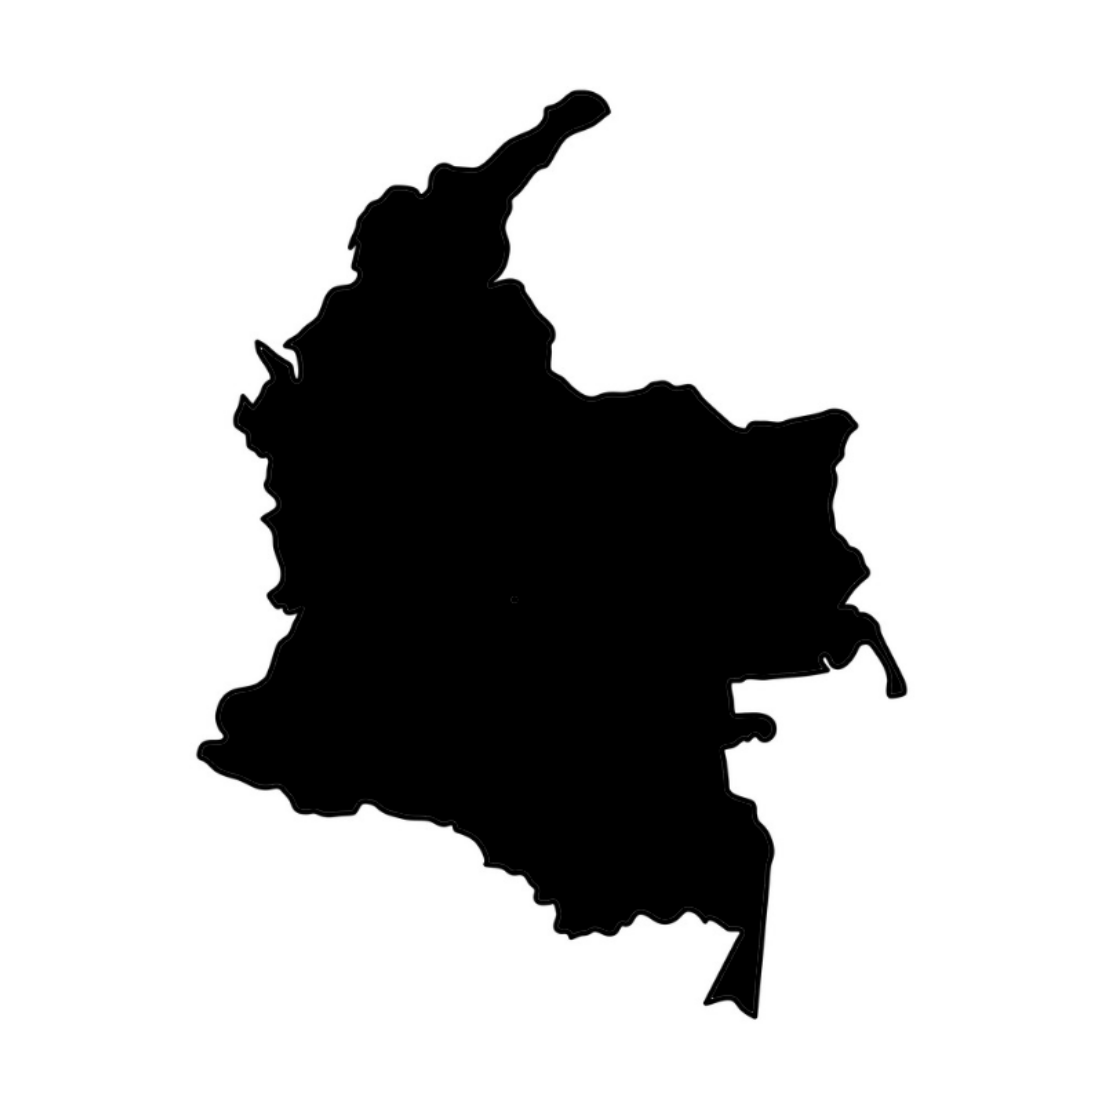

In [29]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(col_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

***

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words from the text.

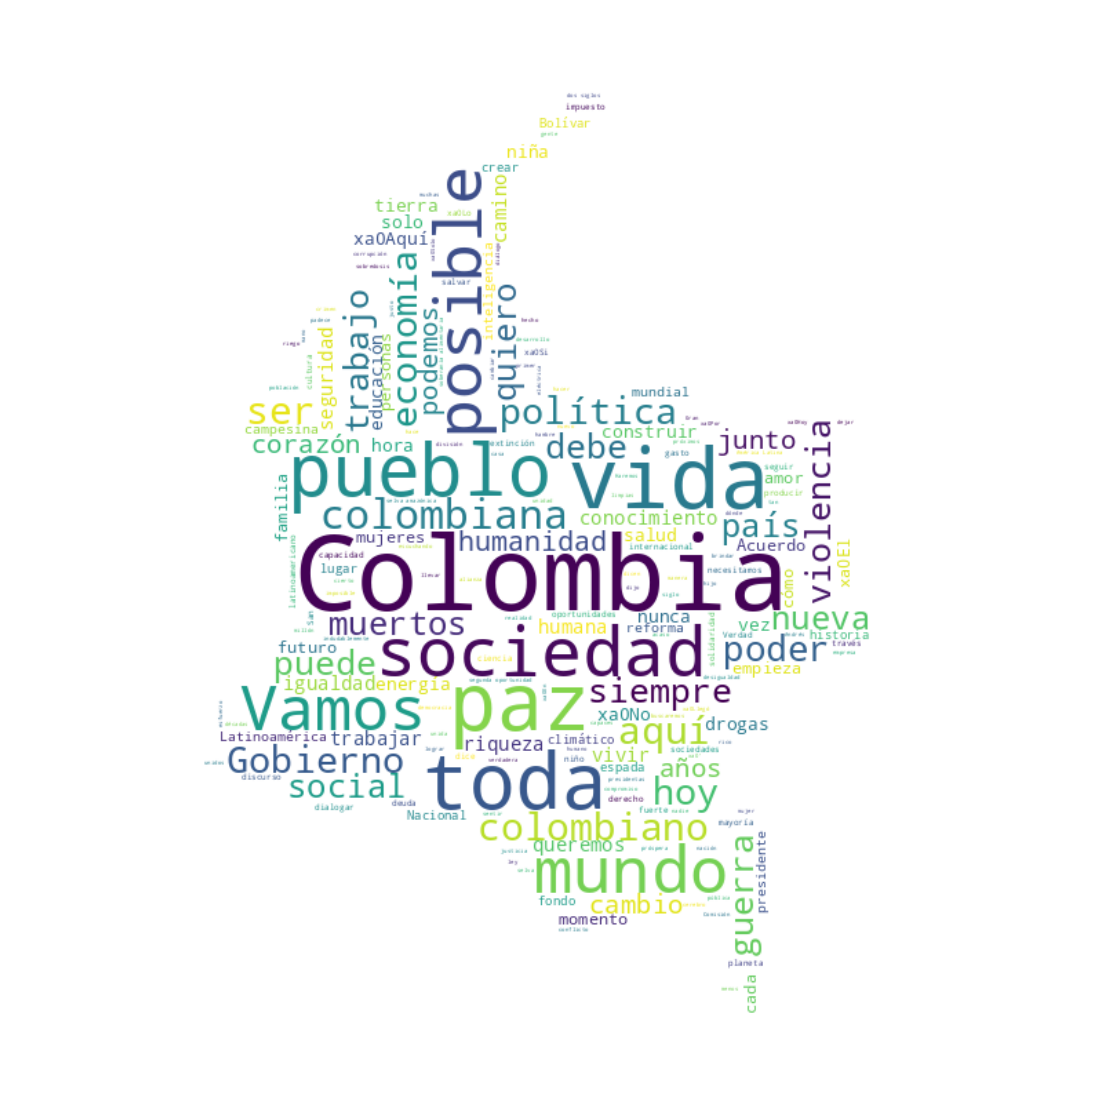

In [30]:
# instantiate a word cloud object
petro_wc = WordCloud(background_color='white', max_words=2000, mask=col_mask, stopwords=stop_words)

# generate the word cloud
petro_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Prepare the data for ploting and count the words

In [31]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

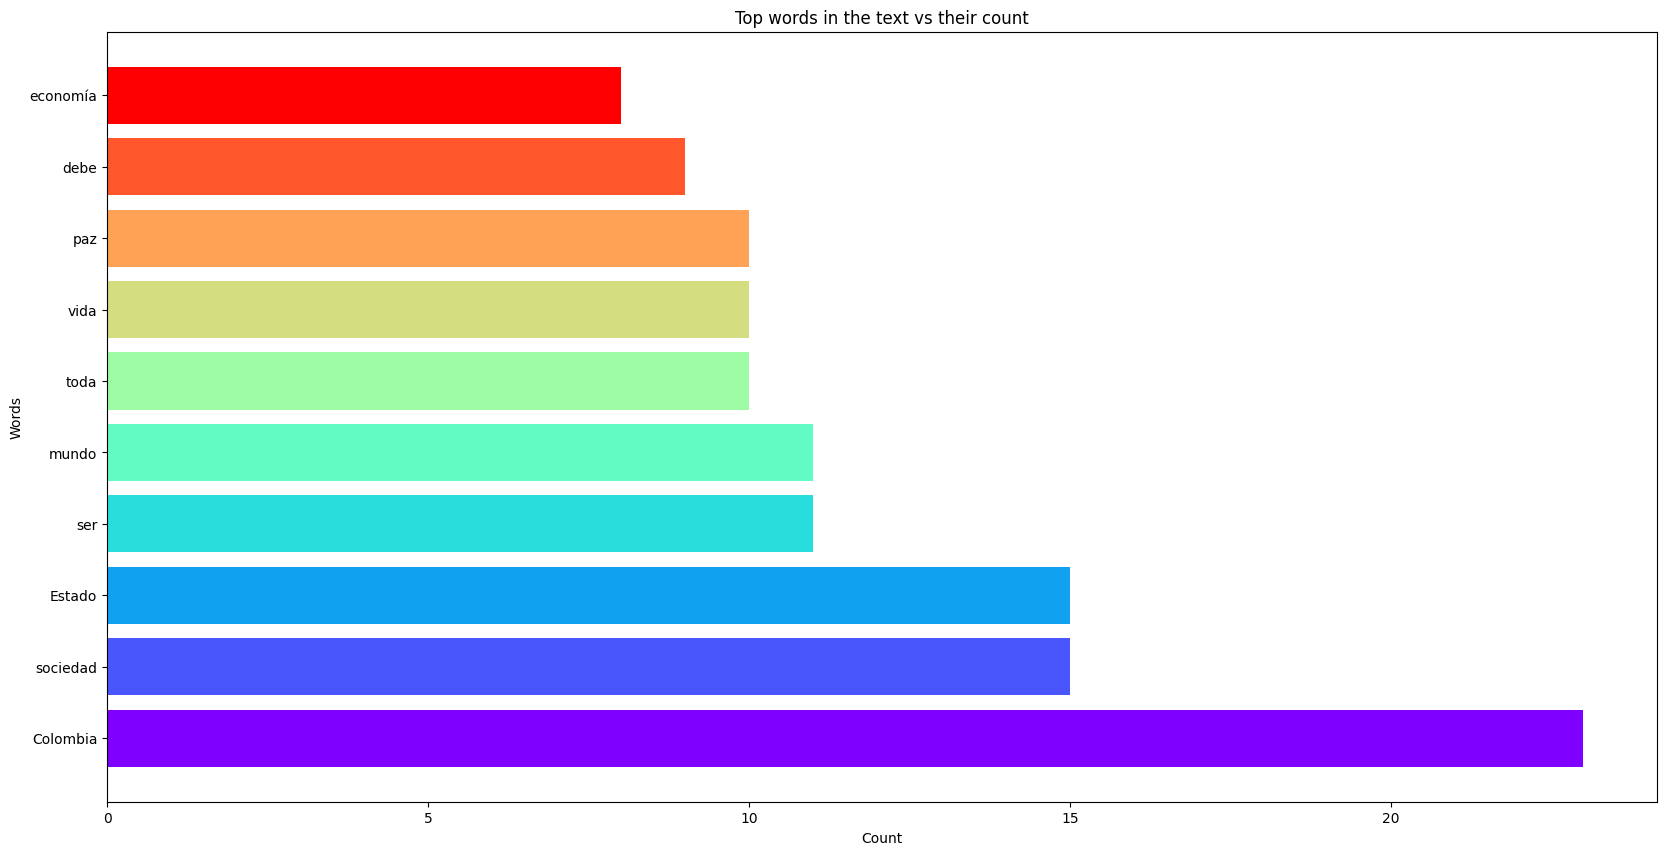

In [32]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

***

# Second Post

In [ ]:
website_url2= rq.get('https://lopezobrador.org.mx/2019/04/04/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-60/').text #Bring the data from the target URL

In [ ]:
soup2 = BeautifulSoup(website_url2,'lxml')

data2 = [element.text for element in soup2.find_all("p")] #Retrieving text from "p" founds
data2 = str(data2) #Convert to string

In [ ]:
stop_words2 = ["año", "mil", "millones", "pesos", "ciento", "El", "En","PRESIDENTE", "ANDRÉS", "MANUEL" ,"LÓPEZ", "OBRADOR", "INTERLOCUTOR", "OBRADOR:", "'PRESIDENTE", "VAMOS", "Y","'Y", "'PREGUNTA:", "ser", "van", "va", "Es","'INTERLOCUTOR:", "'INTERLOCUTORA:","pues", "dos","'Entonces,", "cómo", "ahí", "ENTONCES", "PREGUNTA", "INTERLOCUTORA", "años"] + stop_words_es #Adding aditional StopWords
amlo_wc2 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words2
)

# generate the word cloud
amlo_wc2.generate(data2)

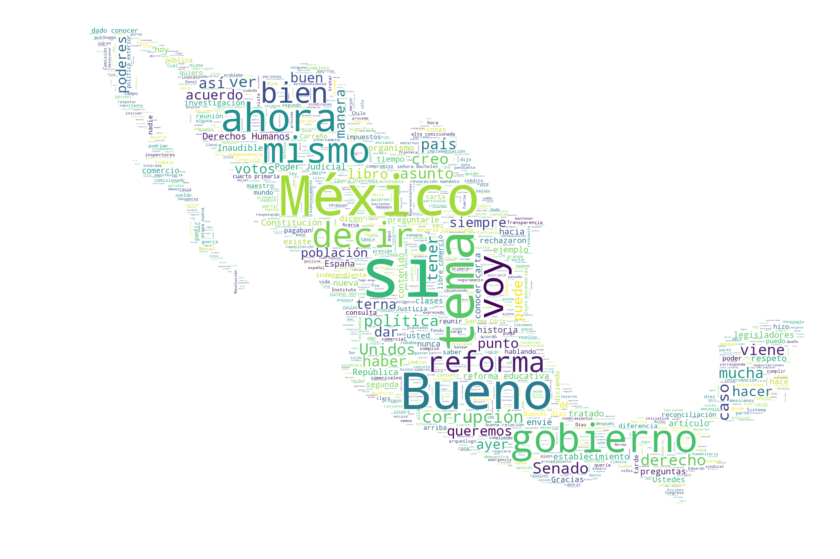

In [ ]:
# instantiate a word cloud object
amlo_wc2 = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words2)

# generate the word cloud
amlo_wc2.generate(data2)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(amlo_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
filtered_words2 = [word for word in data2.split() if word not in stop_words2]
counted_words2 = collections.Counter(filtered_words2)

words = []
counts = []
for letter, count in counted_words2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

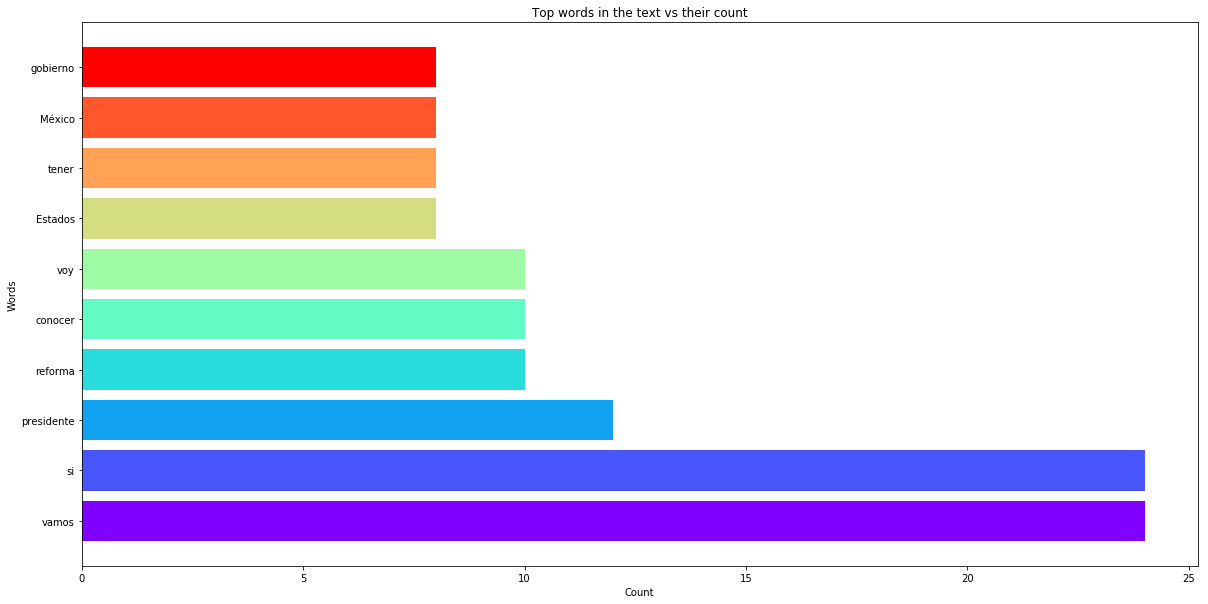

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)


***

## Results
Gustavo Petro
<b>8th August 2022, top 10 words:</b>

<li> Colombia</li>
<li> Sociedad</li>
<li> Estado</li>
<li> Ser</li>
<li> Mundo</li>
<li> Toda</li>
<li> Vida</li>
<li> Paz</li>
<li> Debe</li>
<li> Economia</li>

Loper Obrador
<b>4th april 2019, top 10 words:</b>
<li> Vamos</li>
<li> Si</li>
<li> Presidente</li>
<li> Reforma</li>
<li> Conocer</li>
<li> Estados</li>
<li> Tener</li>
<li> México</li>
<li> Gobierno</li>
<li> Ahora</li>

## Conclusion

We can observe some differences in the word used in the speeches. In petro's speech the focus is on social and economic issues, as well as the role of the state in addressing them. on the other hand in Loper Obrador's speech which suggest a focus on political and governmental issues, as well as the urgency of addressing them.

In the image from 2019's speech we can notice different words. Here the words such as "México", "presidente", "reforma", "gobierno", and "ahora" It <b>seems</b> that the words used during 2019 are not equal to the words in the image from 2022's speech, works like "Colombia", "sociedad", "estado", "vida", "paz", "debe", and "economía"

In conclusion, the speeches reflect the priorities and concerns of each president and their respective countries. Petro's speech highlights the need to address social and economic challenges, while Loper Obrador's speech emphasizes the importance of political reform and governance. Despite the differences, both speeches demonstrate a commitment to improving the lives of their citizens and addressing the challenges facing their countries.

Although we did not analyze deeply the content of the transcripts in this work, we can identify the points that the President of Colombia and President of Mexico want to emphasize with the words used during his speech and the message he wishes to deliver.

## References

https://github.com/amueller/word_cloud/ <br>
https://lopezobrador.org.mx/2019/04/04/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-60/ <br>
https://www.lagrannoticia.com/2022/08/08/lea-aqui-discurso-completo-posesion-presidencial-gustavo-petro-urrego/ <br>
https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx <br>
https://matplotlib.org/ <br>

This notebook was made by <a href="https://www.linkedin.com/in/daniel-s-osorno-ortiz/">Daniel Osorno</a>
Inpired by Luis Novelo platzi